In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])

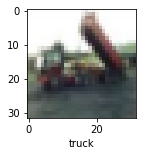

In [8]:
plot_sample(x_train,y_train,2)

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 141s 88ms/step - loss: 1.8854 - accuracy: 0.3267
Epoch 2/2
1563/1563 [==============================] - 135s 87ms/step - loss: 1.6673 - accuracy: 0.3995


In [11]:
from sklearn.metrics import confusion_matrix,classification_report
ypred=model.predict(x_test)
ypred_class=[np.argmax(element) for element in ypred]
print(classification_report(y_test,ypred_class))

313/313 [==============================] - 7s 15ms/step
              precision    recall  f1-score   support

           0       0.59      0.38      0.46      1000
           1       0.51      0.52      0.51      1000
           2       0.30      0.22      0.25      1000
           3       0.31      0.28      0.30      1000
           4       0.34      0.38      0.36      1000
           5       0.37      0.34      0.36      1000
           6       0.45      0.48      0.46      1000
           7       0.50      0.46      0.48      1000
           8       0.41      0.78      0.54      1000
           9       0.52      0.41      0.46      1000

    accuracy                           0.42     10000
   macro avg       0.43      0.42      0.42     10000
weighted avg       0.43      0.42      0.42     10000



In [12]:

    cnn=models.Sequential([
        layers.Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),


        layers.Flatten(),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='sigmoid')
    ])
    cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    cnn.fit(x_train,y_train,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 150s 96ms/step - loss: 1.3548 - accuracy: 0.5103
Epoch 2/2
1563/1563 [==============================] - 148s 94ms/step - loss: 0.9283 - accuracy: 0.6738


In [13]:
ypred1=cnn.predict(x_test)
ypred1_class=[np.argmax(element) for element in ypred1]
print(classification_report(y_test,ypred1_class))

313/313 [==============================] - 7s 22ms/step
              precision    recall  f1-score   support

           0       0.79      0.67      0.72      1000
           1       0.87      0.71      0.78      1000
           2       0.73      0.43      0.55      1000
           3       0.45      0.64      0.53      1000
           4       0.57      0.70      0.63      1000
           5       0.68      0.50      0.57      1000
           6       0.80      0.71      0.75      1000
           7       0.75      0.74      0.74      1000
           8       0.68      0.88      0.76      1000
           9       0.68      0.81      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [14]:
tf.keras.models.save_model(cnn,'my_model.hdf5')

In [15]:
pip install anvil

Note: you may need to restart the kernel to use updated packages.


In [1]:
import anvil.server
 
anvil.server.connect("GM3E376EZZN3X4LSMSCBHK4C-YNUBULJY5MQFUQYG")    

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\ramu9\anaconda3\lib\site-packages\anvil\server.py", line 403, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\ramu9\anaconda3\lib\site-packages\anvil\server.py", line 395, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\ramu9\anaconda3\lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ramu9\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\ramu9\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ramu9\anaconda3\lib\site-packages\anvil\server.py", line 206, in heartbeat_unt

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink


In [17]:
import anvil.media
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import PIL
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import load_img
@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as filename:
        img = load_img(filename)
        
        
    img=img.resize((32,32),resample=PIL.Image.BICUBIC) 
    arr=img_to_array(img)
    arr=np.expand_dims(arr,axis=0)
    arr /=255.0
    score=cnn.predict(arr)
    print(classes[np.argmax(score)])
    return classes[np.argmax(score)]

1/1 [==============================] - 0s 16ms/step
dog
1/1 [==============================] - 0s 16ms/step
ship
1/1 [==============================] - 0s 22ms/step
aeroplane
1/1 [==============================] - 0s 20ms/step
aeroplane
1/1 [==============================] - 0s 19ms/step
dog
